In [77]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import xgboost as xgb

from sklearn.model_selection import train_test_split
import scipy
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import a_funciones as fn 
from a_funciones import *
from collections import Counter
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


ModuleNotFoundError: No module named 'xgboost'

In [9]:
df_2015 = pd.read_csv("https://raw.githubusercontent.com/juantoro5/Analitica-para-RH-E7/main/2015.csv", sep=",")
df_2016 = pd.read_csv("https://raw.githubusercontent.com/juantoro5/Analitica-para-RH-E7/main/2016.csv", sep=",")


In [10]:
df_2015

,EmployeeID,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0.785714,0.178571,0.25,0.00,0.637546,0.111111,0.000000,0.000000,1.000000,...,1,0,1,0,0,0,0,0,1,0
1,2,0.309524,0.321429,0.00,0.00,0.167457,0.000000,0.857143,0.333333,0.500000,...,0,0,1,0,0,0,0,0,0,1
2,3,0.333333,0.571429,0.75,0.75,0.964666,0.111111,0.285714,1.000000,0.333333,...,0,0,0,0,0,1,0,0,1,0
3,4,0.476190,0.035714,1.00,0.50,0.385045,0.333333,0.000000,1.000000,0.833333,...,0,0,1,0,0,0,0,0,1,0
4,5,0.333333,0.321429,0.00,0.00,0.070195,0.444444,0.071429,0.666667,0.333333,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,0.571429,0.142857,0.75,0.00,0.264350,0.333333,0.428571,0.333333,0.833333,...,0,0,0,0,1,0,0,0,0,1
4406,4407,0.261905,0.035714,0.75,0.00,0.087941,0.222222,0.285714,0.000000,0.333333,...,0,0,0,0,1,0,0,1,0,0
4407,4408,0.166667,0.857143,0.25,0.25,0.141811,0.000000,0.642857,0.000000,0.666667,...,0,0,1,0,0,0,0,0,1,0
4408,4409,0.571429,0.607143,0.25,0.00,0.073144,0.000000,0.214286,0.333333,0.333333,...,1,0,0,0,1,0,0,1,0,0


In [11]:
print(df_2015.value_counts())

EmployeeID  Age       DistanceFromHome  Education  JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TrainingTimesLastYear  YearsSinceLastPromotion  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  JobInvolvement  Attrition  AñoEncu  BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  Department_Human Resources  Department_Research & Development  Department_Sales  EducationField_Human Resources  EducationField_Life Sciences  EducationField_Marketing  EducationField_Medical  EducationField_Other  EducationField_Technical Degree  MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single
1           0.785714  0.178571          0.25       0.00      0.637546       0.111111            0.000000           0.000000          1.000000               0.000000                 0.666667                 1.000000         0.333333         0.666667        0.0        2015     0                          0             

In [12]:
df_2016

,EmployeeID,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0.785714,0.178571,0.25,0.00,0.637546,0.111111,0.000000,0.000000,1.000000,...,1,0,1,0,0,0,0,0,1,0
1,2,0.309524,0.321429,0.00,0.00,0.167457,0.000000,0.857143,0.333333,0.500000,...,0,0,1,0,0,0,0,0,0,1
2,3,0.333333,0.571429,0.75,0.75,0.964666,0.111111,0.285714,1.000000,0.333333,...,0,0,0,0,0,1,0,0,1,0
3,4,0.476190,0.035714,1.00,0.50,0.385045,0.333333,0.000000,1.000000,0.833333,...,0,0,1,0,0,0,0,0,1,0
4,5,0.333333,0.321429,0.00,0.00,0.070195,0.444444,0.071429,0.666667,0.333333,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,0.571429,0.142857,0.75,0.00,0.264350,0.333333,0.428571,0.333333,0.833333,...,0,0,0,0,1,0,0,0,0,1
4406,4407,0.261905,0.035714,0.75,0.00,0.087941,0.222222,0.285714,0.000000,0.333333,...,0,0,0,0,1,0,0,1,0,0
4407,4408,0.166667,0.857143,0.25,0.25,0.141811,0.000000,0.642857,0.000000,0.666667,...,0,0,1,0,0,0,0,0,1,0
4408,4409,0.571429,0.607143,0.25,0.00,0.073144,0.000000,0.214286,0.333333,0.333333,...,1,0,0,0,1,0,0,1,0,0


In [13]:
df_2016.value_counts()

EmployeeID  Age       DistanceFromHome  Education  JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TrainingTimesLastYear  YearsSinceLastPromotion  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  JobInvolvement  AñoEncu  BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  Department_Human Resources  Department_Research & Development  Department_Sales  EducationField_Human Resources  EducationField_Life Sciences  EducationField_Marketing  EducationField_Medical  EducationField_Other  EducationField_Technical Degree  MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single
1           0.785714  0.178571          0.25       0.00      0.637546       0.111111            0.000000           0.000000          1.000000               0.000000                 0.666667                 1.000000         0.333333         0.666667        2016     0                          0                                 1 

In [ ]:
#d= pd.unique(df_2015.values.ravel())
#d

In [9]:
# Datos de 2015 para X (tanto entrenamiento como prueba)
#X_train_2015 = df_2015[df_2015['AñoEncu'] == 2015].drop('Attrition', axis=1)

# Datos de 2016 para Y (tanto entrenamiento como prueba)
#y_train_2016 = df_2016[df_2016['AñoEncu'] == 2016]['Attrition']

# Dividimos X del 2015 en conjuntos de entrenamiento y prueba
#X_train, X_test = train_test_split(X_train_2015, shuffle=True, test_size=0.30, random_state=123)

# Dividimos Y del 2016 en conjuntos de entrenamiento y prueba
#y_train, y_test = train_test_split(y_train_2016, shuffle=True, test_size=0.30, random_state=123)

# Verificar las dimensiones
#print('Tamaño del conjunto de entrenamiento (X - 2015): ', X_train.shape)
##print('Tamaño del conjunto de prueba (X - 2015): ', X_test.shape)
##print('Tamaño del conjunto de entrenamiento (Y - 2016): ', y_train.shape)
#print('Tamaño del conjunto de prueba (Y - 2016): ', y_test.shape)


In [10]:
# Definir y_train y X_train para entrenamiento
#y_train = df_2015[df_2015['AñoEncu'] == 2015]['Attrition']
#X_train = df_2015[df_2015['AñoEncu'] == 2015].drop('Attrition', axis=1)

In [19]:
#revisar
#X = df_2015.drop(columns=['AñoEncu','Attrition'])
#y = df_2016['Attrition']

In [22]:
# Definir X e y para el entrenamiento usando df_2015
X = df_2015.drop(columns=['AñoEncu', 'Attrition'])  # Variables independientes
y = df_2015['Attrition']  # Variable dependiente

In [21]:
# Definir X_test para la predicción (datos de 2016)
X_test = df_2016.drop(columns=['AñoEncu']) 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Tamaño del conjunto de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de validación: ', X_test.shape)

Tamaño del conjunto de entrenamiento:  (3528, 30)
Tamaño del conjunto de validación:  (882, 30)


In [24]:
modelo_regresion = LogisticRegression(max_iter=10000)
modelo_regresion.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [25]:
y_pred_2016 = modelo_regresion.predict(X_test)

print("Predicciones de Attrition para 2016: ", y_pred_2016)

Predicciones de Attrition para 2016:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 

In [50]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print('Tamaño del conjunto de entrenamiento: ', X_train.shape)
#print('Tamaño del conjunto de validación: ', X_test.shape)

In [49]:

#x_train,x_test,y_train,y_test = train_test_split(x_train_train_2015,y_train_2016,shuffle = True,test_size = 0.30, random_state=123)
#print('Tamaño del conjunto de entrenamiento: ', x_train.shape)
#print('Tamaño del conjunto de validación: ', x_test.shape)

In [6]:
#Separamos ahora los datos test para la prediccion
#X_test=df_2016[df_2016['AñoEncu'] == 2016].drop('Attrition', axis=1)

In [ ]:
#X_train,x_test,y_train,y_test = train_test_split(X_train,y_train,shuffle = True,test_size = 0.30, random_state=123)
#print('Tamaño del conjunto de entrenamiento: ', X_train.shape)
#print('Tamaño del conjunto de validación: ', x_test.shape)

ENSAYO

In [28]:
##modelo_regresion = LogisticRegression(max_iter=10000, class_weight='balanced')


MODELO 1. REGRESIÓN LOGÍSTICA

In [ ]:
#modelo_regresion = LogisticRegression(max_iter=10000)
#modelo_regresion.fit(X_train, y_train)
#y_train_pred = modelo_regresion.predict(X_train)

#print('Exactitud en el entrenamiento: %.4f'  %accuracy_score(y_train, y_train_pred))

In [29]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
logistic_model = LogisticRegression(max_iter = 100000)

# Entrenar el modelo
logistic_model.fit(X_train, y_train)

#y_pred = logistic_model.predict(X_test)
#print("Predicciones del conjunto de prueba: ", y_pred)


LogisticRegression(max_iter=100000)

In [30]:
# Hacer predicciones
y_pred_2016 = logistic_model.predict(X_test)

In [32]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Exactitud del modelo
accuracy = accuracy_score(y_test, y_pred_2016)
print(f'Exactitud: {accuracy}')

Exactitud: 0.8662131519274376


In [34]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_2016)
print(f'Matriz de confusión: \n{conf_matrix}')

Matriz de confusión: 
[[746  11]
 [107  18]]


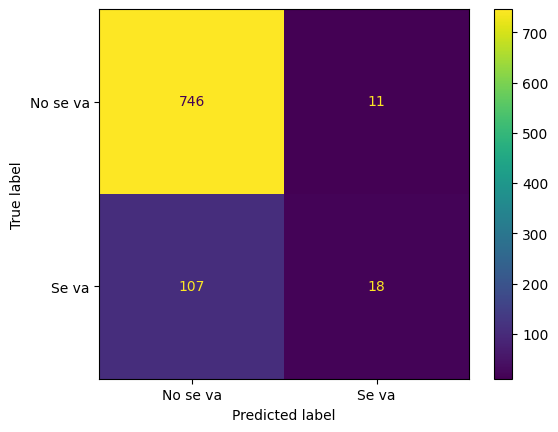

In [54]:
conf_matrix2 = confusion_matrix(y_test, y_pred_2016)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix2, display_labels = ['No se va', 'Se va'])
conf_matrix_display.plot()
plt.show()

In [36]:
# Reporte de clasificación
class_report = classification_report(y_test, y_pred_2016)
print(f'Reporte de clasificación: \n{class_report}')

Reporte de clasificación: 
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       757
         1.0       0.62      0.14      0.23       125

    accuracy                           0.87       882
   macro avg       0.75      0.56      0.58       882
weighted avg       0.84      0.87      0.83       882



In [37]:
print("Distribución de clases en y_train:")
print(y_train.value_counts())

print("\nDistribución de clases en y_test:")
print(y_test.value_counts())


Distribución de clases en y_train:
Attrition
0.0    3003
1.0     525
Name: count, dtype: int64

Distribución de clases en y_test:
Attrition
0.0    757
1.0    125
Name: count, dtype: int64


REGRESIÓN LOGÍSTICA CON BALANCEO

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de regresión logística con balanceo de clases
logistic_modelB = LogisticRegression(class_weight='balanced', random_state=123)

# Entrenar el modelo con el conjunto de entrenamiento
logistic_modelB.fit(X_train, y_train)

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=123)

In [63]:
# Hacer predicciones en el conjunto de prueba
y_pred = logistic_modelB.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

Exactitud: 0.6723356009070295


In [61]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión: ")
print(conf_matrix)

Matriz de confusión: 
[[513 244]
 [ 45  80]]


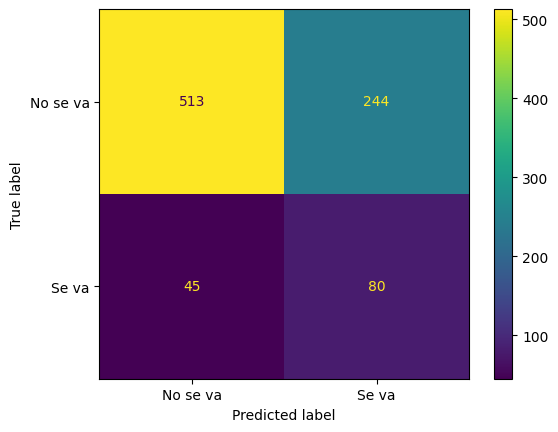

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_display1 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['No se va', 'Se va'])
conf_matrix_display1.plot()
plt.show()

In [41]:
# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación: ")
print(class_report)

Reporte de clasificación: 
              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78       757
         1.0       0.25      0.64      0.36       125

    accuracy                           0.67       882
   macro avg       0.58      0.66      0.57       882
weighted avg       0.82      0.67      0.72       882



MODELO 2. RANDOM FOREST

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de Random Forest sin balanceo de clases
rf_model = RandomForestClassifier(random_state=123)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=123)

In [43]:
# Hacer predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

Exactitud: 0.9875283446712018


In [65]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión: ")
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación: ")
print(class_report)

Matriz de confusión: 
[[513 244]
 [ 45  80]]
Reporte de clasificación: 
              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78       757
         1.0       0.25      0.64      0.36       125

    accuracy                           0.67       882
   macro avg       0.58      0.66      0.57       882
weighted avg       0.82      0.67      0.72       882



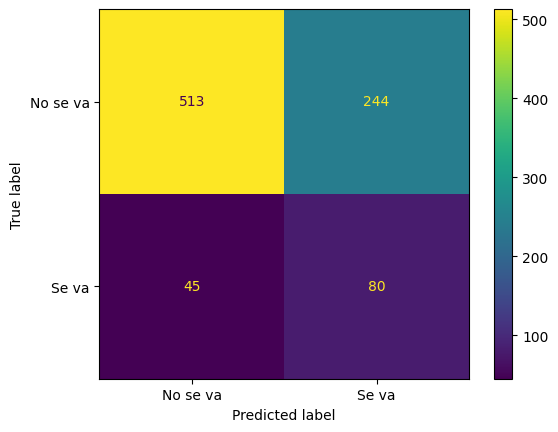

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_display1 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['No se va', 'Se va'])
conf_matrix_display1.plot()
plt.show()

RANDOM FOREST CON BALANCEO

In [45]:
# Crear el modelo de Random Forest con balanceo de clases
rf_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=123)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model_balanced.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=123)

In [46]:
# Hacer predicciones en el conjunto de prueba
y_pred_balanced = rf_model_balanced.predict(X_test)

# Evaluar el modelo
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f'Exactitud con balanceo: {accuracy_balanced}')

Exactitud con balanceo: 0.9841269841269841


In [67]:
# Matriz de confusión con balanceo
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
print("Matriz de confusión con balanceo: ")
print(conf_matrix_balanced)

# Reporte de clasificación con balanceo
class_report_balanced = classification_report(y_test, y_pred_balanced)
print("Reporte de clasificación con balanceo: ")
print(class_report_balanced)

Matriz de confusión con balanceo: 
[[757   0]
 [ 14 111]]
Reporte de clasificación con balanceo: 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       757
         1.0       1.00      0.89      0.94       125

    accuracy                           0.98       882
   macro avg       0.99      0.94      0.97       882
weighted avg       0.98      0.98      0.98       882



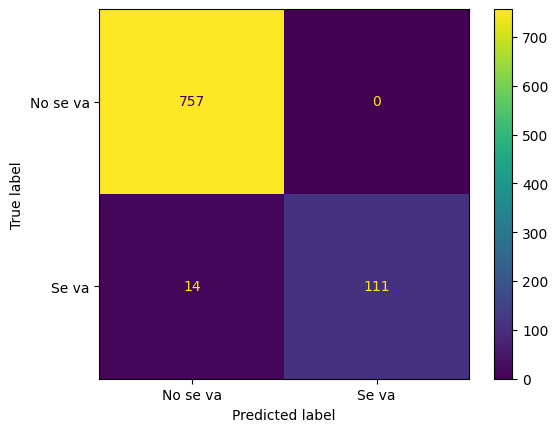

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred_balanced)
conf_matrix_display1 = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['No se va', 'Se va'])
conf_matrix_display1.plot()
plt.show()

MODELO 3. XGBoost

In [78]:
#pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de XGBoost sin balanceo de clases
xgb_model = xgb.XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss')

# Entrenar el modelo con el conjunto de entrenamiento
xgb_model.fit(X_train, y_train)


SyntaxError: invalid syntax (3674641626.py, line 1)

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión: ")
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de clasificación: ")
print(class_report)

XGBoost con balanceo

In [ ]:
# Calcular el peso de balance (proporción entre las clases)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Crear el modelo de XGBoost con balanceo de clases
xgb_model_balanced = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=123, use_label_encoder=False, eval_metric='logloss')

# Entrenar el modelo con el conjunto de entrenamiento
xgb_model_balanced.fit(X_train, y_train)

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred_balanced = xgb_model_balanced.predict(X_test)

# Evaluar el modelo
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f'Exactitud con balanceo: {accuracy_balanced}')


In [ ]:

# Matriz de confusión con balanceo
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
print("Matriz de confusión con balanceo: ")
print(conf_matrix_balanced)

# Reporte de clasificación con balanceo
class_report_balanced = classification_report(y_test, y_pred_balanced)
print("Reporte de clasificación con balanceo: ")
print(class_report_balanced)

In [ ]:
#DE AQUI PA ABAJO ES LO QUE SE TENIA DE ANTES
mcla=LogisticRegression()
mrfc=RandomForestClassifier()
modelos=[mcla,mrfc]
var_names=fn.sel_variables(modelos,X_train,y_train,threshold=0.7)
var_names

Modelo con Regresion Logistica

In [ ]:
x = df_2015.drop('Attrition', axis=1, inplace=True)
y = df_2015['Attrition']


In [ ]:
# División de datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

# Informe de clasificación
print(classification_report(y_test, y_pred))

Modelo con Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Separar las características predictoras (sin 'Attrition') y la variable objetivo ('Attrition')
#X = df_models.drop(columns=['Attrition'])
#y = df_models['Attrition'] 
X = df_sinVO  
y = df_VO  
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Definir el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

In [ ]:
# Predecir con los datos de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))